# Ciência dos Dados - 2°Semestre - Engenharia
#### Carlos Eduardo Dip

## Tema: Expectativa de vida de países que assinaram o tratado de Kyoto

#### Hipótese:
Países que assinaram o tratado devem desenvolver melhor expecatativa de vida.

#### Mecanismo:
Espera-se que, devido à proposta do tratado, os países emitiriam menos poluentes na atmosfera, devido à redução da produção industrial e/ou da melhoria da eficiência da produção presente, e portanto, a expectativa de vida seria maior, já que o ar seria mais limpo (ou menos poluído).


(A expectativa de vida foi analisada a partir de 1945 (final da segunda guerra), pois considerou-se houve uma grande queda durante ela (7 anos), e o período anterior a 1938 era defasado demais para ser comparado com dados mais recentes, e portanto só iriam poluir e enviesar os dados.

# O Tratado de Kyoto (Protocolo de Kyoto)

## Resumo:
Países se comprometeram a reduzir emissão de gases. O Protocolo de Kyoto é um acordo internacional entre os países integrantes da Organização das Nações Unidas (ONU), firmado com o objetivo de se reduzir a emissão de gases causadores do efeito estufa e o consequente aquecimento global.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_life = pd.read_excel('life.xlsx')
data_life = data_life.rename({'country':'Country'},axis = 1 ).set_index('Country')
data_life.loc['Pakistan']

1945    35.9
1946    36.3
1947    11.3
1948    33.1
1949    37.5
1950    37.9
1951    38.6
1952    39.9
1953    41.1
1954    42.3
1955    43.5
1956    44.7
1957    45.9
1958    47.0
1959    48.1
1960    49.1
1961    50.1
1962    51.1
1963    52.0
1964    52.9
1965    53.6
1966    54.4
1967    55.1
1968    55.7
1969    56.4
1970    57.0
1971    52.3
1972    57.7
1973    58.1
1974    58.2
        ... 
1989    62.3
1990    62.5
1991    62.5
1992    62.4
1993    62.3
1994    62.2
1995    62.0
1996    62.1
1997    62.1
1998    62.3
1999    62.5
2000    62.6
2001    62.8
2002    62.9
2003    63.1
2004    63.4
2005    62.6
2006    64.0
2007    64.4
2008    64.7
2009    65.0
2010    65.3
2011    65.8
2012    66.1
2013    66.5
2014    66.9
2015    67.3
2016    67.7
2017    67.8
2018    68.0
Name: Pakistan, Length: 74, dtype: float64

In [64]:
### Países que não estão no tratado:
non_Kyoto = ['Afghanistan',
            'Andorra',
            'Brunei',
            'Chad',
            'Comoros',
            'Unitad States',
            'Iraq',
            'Monaco',
            'Palestine',
            'Western Sahara',
            'Central African Republic',
            'Saint Kitts and Nevis',
            'San Marino',  
            'São Tomé e Príncipe',  
            'Serbia',
            'Somalia', 
            'Tajikistan',
            'Taiwan',
            'Timor-Leste',
            'Tonga',
            'Vatican']

### Coluna booleana (1 e 0) para países que fazem parte (ou não) do tratado.
data_life['Kyoto'] = [int(name not in non_Kyoto) for name in data_life.index.tolist()]


## Análise exploratória inicial

#### Primeira visualização dos dados 
Aqui, constroem-se gráficos para facilitar a visualização da informação disponível, com intuito de conhecer melhor o comportamento das variáveis envolvidas, e dos dados em geral.

In [65]:
data_life_Kyoto = data_life.loc[data_life['Kyoto'] == 1]
Kyoto_Life_Series = data_life_Kyoto.mean(axis=0, skipna = True)
data_life_no_Kyoto = data_life.loc[data_life['Kyoto'] == 0]
no_Kyoto_Life_Series = data_life_no_Kyoto.mean(axis=0, skipna = True)
del no_Kyoto_Life_Series['Kyoto']
del Kyoto_Life_Series['Kyoto']

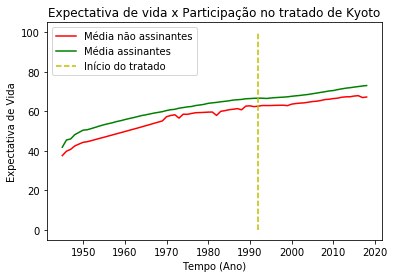

In [66]:
plt.plot(range(1945,2019), no_Kyoto_Life_Series, label = 'Média não assinantes', color = 'r')
plt.plot(range(1945,2019), Kyoto_Life_Series, label = 'Média assinantes', color = 'g')
plt.plot([1992,1992],[0,100], 'y--', label = 'Início do tratado')
plt.legend()
plt.xlabel('Tempo (Ano)')
plt.ylabel('Expectativa de Vida')
plt.title('Expectativa de vida x Participação no tratado de Kyoto')
plt.show()

In [67]:
data_life_Kyoto2 = data_life.loc[data_life['Kyoto'] == 1]
Kyoto_Life_Series2 = data_life_Kyoto2.median(axis=0, skipna = True)
data_life_no_Kyoto2 = data_life.loc[data_life['Kyoto'] == 0]
no_Kyoto_Life_Series2 = data_life_no_Kyoto2.median(axis=0, skipna = True)
del no_Kyoto_Life_Series2['Kyoto']
del Kyoto_Life_Series2['Kyoto']

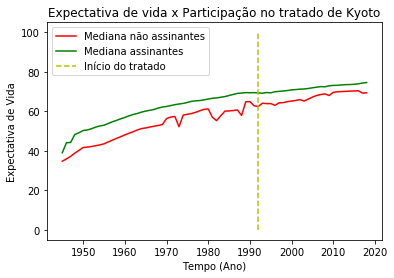

In [68]:
plt.plot(range(1945,2019), no_Kyoto_Life_Series2, label = 'Mediana não assinantes', color = 'r')
plt.plot(range(1945,2019), Kyoto_Life_Series2, label = 'Mediana assinantes', color = 'g')
plt.plot([1992,1992],[0,100], 'y--', label = 'Início do tratado')
plt.legend()
plt.xlabel('Tempo (Ano)')
plt.ylabel('Expectativa de Vida')
plt.title('Expectativa de vida x Participação no tratado de Kyoto')
plt.show()

In [73]:
lista_paki = data_life.loc['Afghanistan']
del lista_paki['Kyoto']

lista_afgh = data_life.loc['Pakistan']
del lista_afgh['Kyoto']

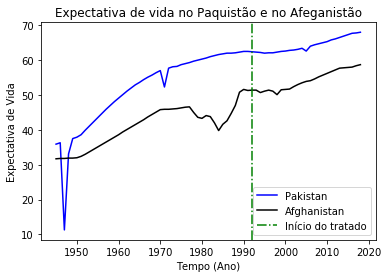

In [75]:
plt.plot(range(1945,2019), lista_afgh, label = 'Pakistan', color = 'b')
plt.plot(range(1945,2019), lista_paki, label = 'Afghanistan', color = 'k')
plt.axvline(1992, color = 'green', ls = '-.', label = 'Início do tratado')
plt.xlabel('Tempo (Ano)')
plt.ylabel('Expectativa de Vida')
plt.title('Expectativa de vida no Paquistão e no Afeganistão')
plt.legend()
plt.show()